In [1]:
import pandas as pd

# US Covid Cases

In [2]:
cdf = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-24-2020.csv')
cdf.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-25 04:47:52,32.3182,-86.9023,76005,1438,32510.0,42057.0,1,1550.114874,628984.0,9157.0,1.891981,84000001,USA,12828.069918,12.047892
1,Alaska,US,2020-07-25 04:47:52,61.3707,-152.4044,2249,19,800.0,1430.0,2,307.431532,200572.0,NaN,0.844820,84000002,USA,27417.588802,NaN
2,American Samoa,US,2020-07-25 04:47:52,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,1037.0,NaN,NaN,16,ASM,1863.733578,NaN
3,Arizona,US,2020-07-25 04:47:52,33.7298,-111.4312,156301,3143,20171.0,132987.0,4,2147.370203,836817.0,7461.0,2.010864,84000004,USA,11496.765158,4.773482
4,Arkansas,US,2020-07-25 04:47:52,34.9697,-92.3731,37249,394,29827.0,7028.0,5,1234.308126,461464.0,2361.0,1.057747,84000005,USA,15291.384066,6.338425


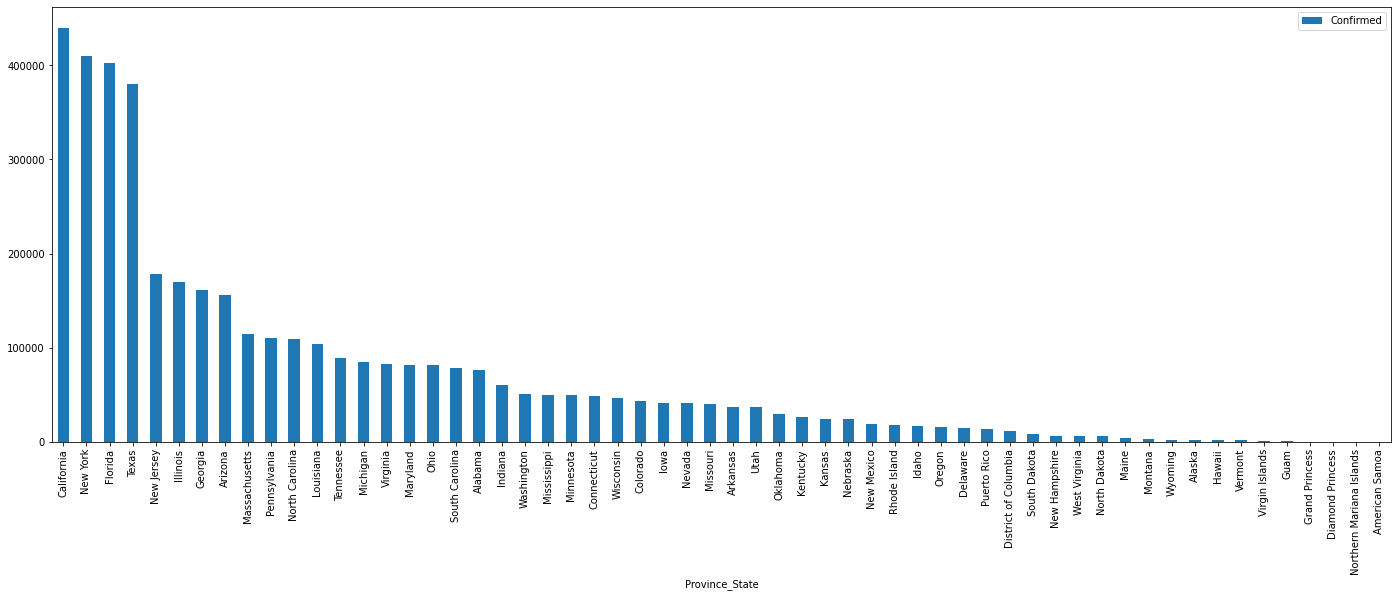

In [4]:
cdf = cdf.sort_values("Confirmed", ascending=False)
cdf.plot.bar(x="Province_State", y="Confirmed", figsize=(24, 8))

California has the majority of Covid cases.

# Cases per Capita

In [3]:
pdf = pd.read_csv('state-populations.csv')
pdf.head()

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [5]:
df = pd.merge(cdf, pdf, left_on='Province_State', right_on='State')
df['Percent_Confirmed'] = df['Confirmed'] / df['2018 Population'] * 100
df = df.sort_values('Percent_Confirmed', ascending=False)
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,State,2018 Population,Percent_Confirmed
11,Louisiana,US,2020-07-25 04:47:52,31.1695,-91.8678,103734,3715,61456.0,38563.0,22,...,1199726.0,NaN,3.581275,84000022,USA,25807.252376,NaN,Louisiana,4682509,2.215351
7,Arizona,US,2020-07-25 04:47:52,33.7298,-111.4312,156301,3143,20171.0,132987.0,4,...,836817.0,7461.0,2.010864,84000004,USA,11496.765158,4.773482,Arizona,7123898,2.194038
1,New York,US,2020-07-25 04:47:52,42.1657,-74.9481,410450,32596,72552.0,305302.0,36,...,5444845.0,89995.0,7.941528,84000036,USA,27988.937347,21.925935,New York,19862512,2.066456
4,New Jersey,US,2020-07-25 04:47:52,40.2989,-74.5210,178345,15765,32001.0,130579.0,34,...,1887644.0,21184.0,8.839609,84000034,USA,21252.011047,11.878101,New Jersey,9032872,1.974400
2,Florida,US,2020-07-25 04:47:52,27.7663,-81.6868,402312,5653,NaN,396659.0,12,...,3276636.0,23575.0,1.405128,84000012,USA,15255.964816,5.859880,Florida,21312211,1.887707


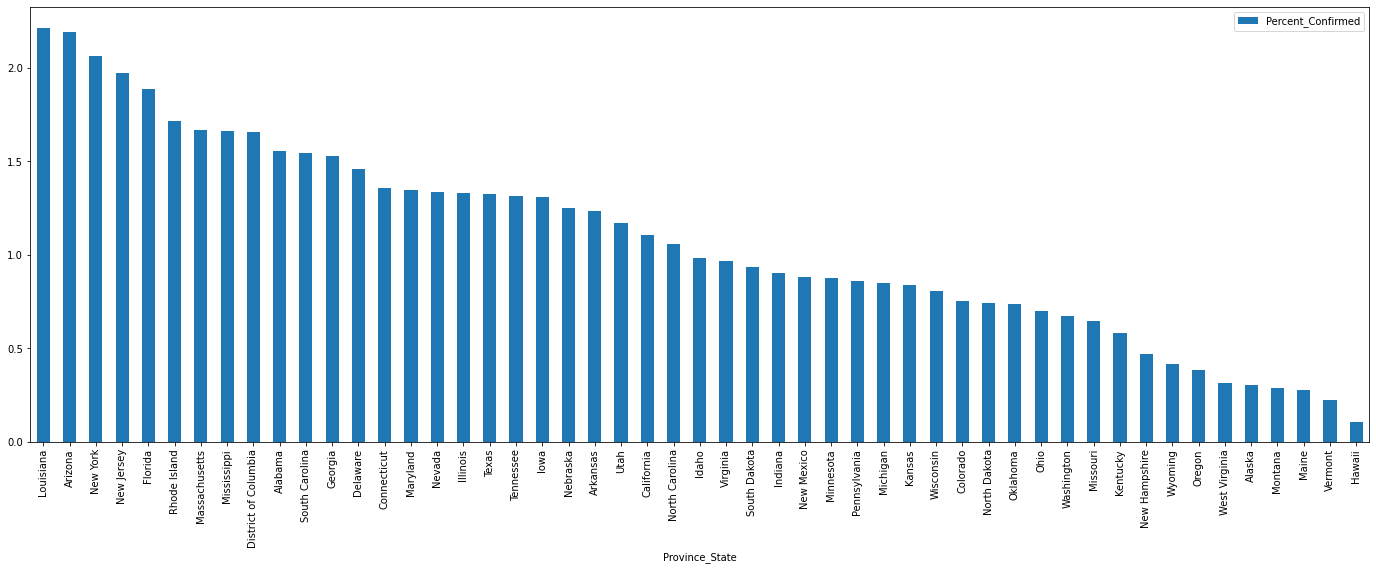

In [6]:
df.plot.bar(x='Province_State', y='Percent_Confirmed', figsize=(24, 8))

It more instructive to look at cases per capita. By dividing the number of cases by the population, we can see that California moves from the front of the pack to middle of the pack.